In [6]:
import numpy as np
import matplotlib.pyplot as plt
from Pad import PadZero
from Pool import MaxPool, AveragePool
from Convolution import SingleSlice

np.random.seed(1)

In [70]:
def Forward(parameter,hyperparameters,a,w,b = 0):
    (m,oldnH,oldnW,nC) = a.shape#Input shape of tensor
    if type(w) == int: f = w
    else:(f,f,nC) = w.shape#Input shape of weights
    
    stride = hyperparameters["stride"]
    pad = hyperparameters["padding"]
    
    newNH = int((oldnH - f + 2*pad)/stride) +1
    newNW = int((oldnW - f + 2*pad)/stride) +1
    
    
    z = np.zeros((m,newNH,newNW,nC), dtype = np.int32)
    if (pad != 0): 
        a = PadZero(a, pad)
    (m,nH,nW,nC) = a.shape
    print("x{}: \n{}".format(a.shape,a[0,:,:,0]))
    for m1 in range(m):
        for i,h1 in enumerate(range(0,nH -f +1,stride)):
            for j,w1 in enumerate(range(0,nW -f +1, stride)):
                for c1 in range(nC):
                    matrix = a[m1,h1:h1+f,w1:w1+f,c1]
                    try:
                        #print("{}.{})matrix({}): \n{}".format(i,j,matrix.shape,matrix))
                        z[m1,i,j,c1] = SingleSlice(matrix,w,b) if parameter == "convolution" else MaxPool(matrix) if parameter == "maxpooling" else AveragePool(matrix)
                        #print("{}.{})z: \n{}".format(i,j,z[m1,i,j,c1]))
                    except:
                        print("error")
                        break
    
    if parameter == "convolution":
        assert (z.shape == (m,oldnH,oldnW,nC))
        cache = (a, w, b, hyperparameters)
        return z,cache
    else:
        return z

filter: 
 [[1 1 1]
 [1 1 1]
 [1 1 1]]
x(1, 9, 9, 1): 
[[1 1 0 0 1 1 1 1 1]
 [0 0 1 0 1 1 0 0 1]
 [0 0 0 1 0 0 1 0 0]
 [0 1 0 0 0 1 1 1 1]
 [1 0 0 0 1 1 1 1 1]
 [1 0 1 1 0 0 1 0 0]
 [1 1 1 0 1 0 0 1 1]
 [0 1 1 1 1 0 0 1 1]
 [0 0 0 0 1 1 1 0 1]]
0.0)xConv(1, 4, 4, 1): 
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


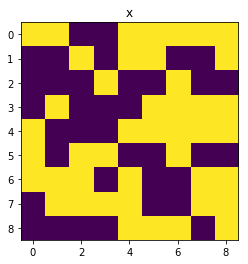

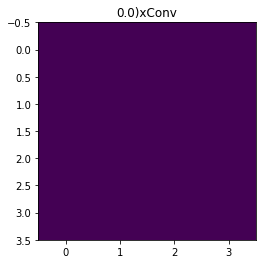

In [72]:
np.random.seed(1)

m = 1 # Number of examples
nH = 9 # The height of the tensor
nW = 9 # The width of the tensor
nC = 1 # Number of channels
sizeFilter = 3 # The shape of filter
stride = 2 # The step of slice on matrix
pad = 0 # The addition of the height and width
x = np.random.randint(0,2,(m,nH,nW,nC)) # Creating random input data
w = np.ones((sizeFilter,sizeFilter,nC), dtype = np.int32) # Creating random weights
b = 0 # The bias
hyperparameters = {"stride": stride, "padding":pad} # The dictionary of hyperparameters
print("filter: \n", w[:,:,0])

fig, ax1 = plt.subplots(1,1)
ax1.set_title("x")
ax1.imshow(x[0,:,:,0])

z = Forward("maxpooling",hyperparameters,x,2) # Getting a new tensor and cache(for back propagation)

for i in range(m):
    for j in range(nC):
        print("{}.{})xConv{}: \n{}".format(i,j,z.shape,z[i,:,:,j]))
        fig, ax2 = plt.subplots(1,1)
        ax2.set_title("{}.{})xConv".format(i,j))
        ax2.imshow(z[i,:,:,j])
